In [69]:
# Импорт необходимых библиотек, классов и ф-ций
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

In [70]:
def prepare_data(data_file_name):
    # Шапка CSV-файла в виде массива, сформирована 
    # на основе файла 'agaricus-lepiota.name' из репозитория
    header = ['class', 'cap_shape', 'cap_surface',
              'cap_color', 'bruises', 'odor', 'gill_attachment',
              'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
              'stalk_root', 'stalk_surface_above_ring',
              'stalk_surface_below_ring', 'stalk_color_above_ring',
              'stalk_color_below_ring', 'veil_type', 'veil_color',
              'ring_number', 'ring_type', 'spore_print_color',
              'population', 'habitat']
    df = pd.read_csv(data_file_name, sep=',', names=header)

    # Записи с "?" вместо параметра символизируют его отсутствие
    # выбрасываем эти записи из нашего набора данных
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)

    # Съедобность или ядовитость обозначаются в нашем наборе данных
    # символами 'e' или 'p' соответственно. Необходимо представить эти данные в числовом
    # виде, поэтому делаем 0 вместо ядовитого, 1 - вместо съедобного значения
    df['class'].replace('p', 0, inplace=True)
    df['class'].replace('e', 1, inplace=True)

    # Изначально параметры грибов представлены в символьном виде,
    # то есть в виде слов. Tensor Flow может работать только с цифровыми
    # данными. Библиотека Pandas с помощью функции "get_dummies"
    # конвертирует наши данные в цифры
    cols_to_transform = header[1:]
    df = pd.get_dummies(df, columns=cols_to_transform)

    # Теперь надо разделить конвертированные данные
    # на два набора - один для тренировки (большой)
    # и один для тестирования нейросети (поменьше)
    df_train, df_test = train_test_split(df, test_size=0.2,random_state=56)

    # Итоговые наборы записываем во временные csv-файлы, т.к.
    # необходимо записать количества столбцов и строк в начало шапки
    # рабочих csv, как того требует Tensor Flow
    df_train.to_csv('train.csv', index=False)
    df_test.to_csv('test.csv', index=False)

In [71]:
# Подготовка данных
prepare_data("agaricus-lepiota.data")

In [72]:
# Разбиение тестовой и обучающей выборки на X и Y

test_df = pd.read_csv("test.csv", sep=',')
train_df = pd.read_csv("train.csv", sep=',')

# Входные данные: это вся таблица за исключение столбца 'class'
x_test = test_df.drop(['class'], axis=1)  
x_train = train_df.drop(['class'], axis=1)

# Выходные данные: это только столбец 'class'
y_test = test_df['class'] 
y_train = train_df['class']


In [91]:
# Создаем экземпляры классификаторов с разными глобальными параметрами
cnb = CategoricalNB(alpha=1)
cnb2 = CategoricalNB(alpha=0.5)
cnb3 = CategoricalNB(alpha=1.0e-10)

# Производим обучение
cnb.fit(x_train, y_train)
cnb2.fit(x_train, y_train)
cnb3.fit(x_train, y_train)

# Производим оценку и выводим результат обучения
print("Alpha = 1:")
print(" Точность в тестовой выборке: %f" % cnb.score(x_test, y_test))
print(" Точность в обучающей выборке: %f" % cnb.score(x_train, y_train))
print()
print("Alpha = 0.5:")
print(" Точность в тестовой выборке: %f" % cnb2.score(x_test, y_test))
print(" Точность в обучающей выборке: %f" % cnb2.score(x_train, y_train))
print()
print("Alpha = 1.0e-10:")
print(" Точность в тестовой выборке: %f" % cnb3.score(x_test, y_test))
print(" Точность в обучающей выборке: %f" % cnb3.score(x_train, y_train))

Alpha = 1:
 Точность в тестовой выборке: 0.938884
 Точность в обучающей выборке: 0.939756

Alpha = 0.5:
 Точность в тестовой выборке: 0.950399
 Точность в обучающей выборке: 0.946622

Alpha = 1.0e-10:
 Точность в тестовой выборке: 0.994686
 Точность в обучающей выборке: 0.997785


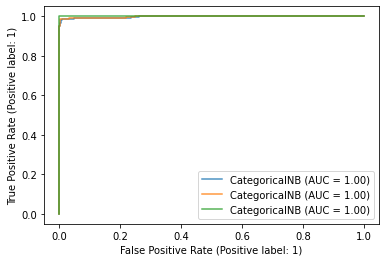

In [93]:

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

ax = plt.gca()

cnb_disp = RocCurveDisplay.from_estimator(cnb, x_test, y_test, ax=ax, alpha=0.8)
cnb2_disp = RocCurveDisplay.from_estimator(cnb2, x_test, y_test, ax=ax, alpha=0.8)
cnb3_disp = RocCurveDisplay.from_estimator(cnb3, x_test, y_test, ax=ax, alpha=0.8)